# Physics 420/580 Final Exam 
## December 19, 2019 2pm-5pm  L1-150

Do three of the four following problems.  If you attempt all four, your best three will be used for your mark.  Use the Jupyter notebook, inserting your code and any textual answers/explanations in cells between the questions. (Feel free to add additional cells!)  Marks will be given based on how clearly you demonstrate your understanding.    

There are no restrictions on downloading from the internet, eclass,  or the use of books, notes, or any other widely available computing resources.  However, **you are not allowed** to communicate with each other or collaborate in any way and uploading to the internet or sending or receiving direct communications is not appropriate.  You are required to sit the exam in L1-150, and to upload it before you leave.     

When you are finished, upload the jupyter notebook to eclass. 

Also be careful to save the notebook periodically and double check **that you upload the file that has your answers in it!**


# The Normal Distribution

 Write a simple program that:
 
 a.  Calculates and plots the function  
 $$G(x;\mu,\sigma)=1000e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$ with an average value $\mu=10$, width $\sigma=2$.  This is proportional to the normal distribution.

The three dimensional normal distribution is the product of normal distributions in the three coordinates:
\begin{equation} G(\vec{x}; \vec{x_0},\sigma, A)=Ae^{-\frac{(\vec{x}-\vec{x_0})^2}{2\sigma^2}}\end{equation}

Set $\vec{x_0}=(6,8,0)$ and throw 100000 random points by throwing the three coordinates independently with $\sigma=2$ for each coordinate.

Histogram and plot the distributions for each coordinate.  Comment on how you pick the right number of bins for your histogram.




Now histogram and plot the distribution of $r=|\vec{x}-\vec{x_0}|$.




This should look like the analytic 3d normal distribution in spherical coordinates:
\begin{equation}G(r;\sigma,A)=4\pi A r^2 e^{-\frac{r^2}{2\sigma^2}}.\end{equation}  We derived this equation by converting $G(\vec{x}; \vec{x_0},\sigma, A)$ into spherical coordinates and integrating over $\theta$ and $\phi.$

Determine A for 100000 points by numerically integrating:
\begin{equation}100000=\int_0^{20} G(r;\sigma,A)dr =A\int_0^{20} G(r;\sigma,1)dr\end{equation}

With a known A, you can now replot your histogram and overlay the calculation of $G(r;\sigma,A)$.  To have $G(r;\sigma,A)$ overlay properly you will need to include the bin widths, which you can do either by the exact integral or the approximation: $\int_{r_i}^{r_{i+1}}G(r;\sigma,A)dr \approx G(r;\sigma,A)\Delta r$, where $r_i$ is the start of the i-th bin and $r_{i+1}$ is the start of the next bin, and $\Delta r=r_{i+1}-r_i$.  



# Monte Carlo

A radioactive source is placed into a large water Cerenkov detector (which is able to detect high energy electrons/gammas in pure water by looking at visible photons from the Cerenkov process.)  Before the source is deployed, the detector measures background radiation at a rate of 200 events/second.  The source produces two types of events:  
1.  single gamma rays with a rate of 100 events/second 
2. events that produce both a gamma ray and a neutron at a rate of 100 events/second.  The gamma ray is detected immediately after creation with an efficiency of 50% (for both gamma rays from the source- the singles and the gamma/neutron coincidences).  The neutron is detected after a capture time, which is quantified with a mean of 250 microseconds. In math, this says that the time distribution of neutron captures is $$P(t)=250\times 10^{-6} e^{-t/(250\times 10^{-6})},$$ where t is the time difference (in seconds) between gamma/neutron creation and neutron capture. The neutron detection efficiency is. 40%.    The time distribution of neutron captures is $$P(t)=250\times 10^{-6} e^{-t/(250\times 10^{-6})},$$ where t is the time difference (in seconds) between gamma/neutron creation and neutron capture.

Write a simple MC to model 1000 seconds of running time.   Generate the times for background events, the single gamma rays from the source and the gamma/neutron coincidences.  Then generate the neutron capture times and finally apply the detection efficiencies for each type of event.

Histogram and plot:  

1.  The times of each type of event (on an x-axis with a scale of 0-1000 seconds)
2.  The intervals between a detected event and the next detected event (from 0-10 ms).  To do this you might need to make an array with the times of all detections, sort it and then calculate the time from one event to the next.
3.  Repeat plots 1 and 2 for the case where the background rate is 1000 events/second.

# Solving and Fitting

An object is viewed by 6 theodolites (telescopes that allow you to measure angles with respect to the vertical($\theta$) and with respect to a horizontal($\phi$).  The locations of the telescopes and the measured angles are given in the code cell below (all with respect to a single coordinate system,) which you can run in order to avoid cutting and pasting. 

Since each theodolite gives you two quantities we have 12 measurements.  There are three unknowns- the x, y, and z coordinates of a point on an object.  Consequently the system of equations is overdetermined, and we would typically be unable to solve.  

In a case like this, we "solve" the system of equations by fitting.  

Write a function that calculates the theta and phi angles (spherical coordinates) given an arbitrary point position and an theodolite position.

Using this function, write a second function that calculates the residuals of the calculation with respect to the data. Then find the position of the target by fitting the calculations to the data.  

Extract the uncertainties on the position.  In order to do this, you will need to estimate the size of the uncertainty in the angles to incorporate into the residual calculation.  One way to do this is by histogramming the residuals ((data-calculation)/uncertainty) and getting a sense of how big they are- if the uncertainties are correct the RMS/width of the residuals distribution should be about 1.    


In [12]:
import numpy as np
positions =  np.array([[-0.0114519 ,  9.99999344,  6.69130799],
       [ 6.33116335, -7.74056655,  3.59009715],
       [-9.85887257, -1.67410623,  4.56138703],
       [ 4.09466118,  9.12325325,  7.32437587],
       [-3.37815507, -9.41212348,  3.67927878],
       [-5.4274145 , -8.39899827,  6.8865273 ]])
thetaMeasures = np.array( [2.3164460126412245, 1.6313464103926718, 1.6970719353033004, 2.533624050255211, 1.6289243873579955, 1.8159707640506253] )
phiMeasures = np.array( [-0.9844385514247201, 1.8432675248986576, 0.5831709514637226, -2.132723211863188, 1.2215622389804748, 1.0853416750730511] )

print('Theodolite x  \t Theodolite y \t Theodolite z \t Meas.theta \t Meas. phi') 
for i in range(0,6):
    print('%f  \t %f \t %f \t %f \t %f '%(positions[i,0],positions[i,1],positions[i,2],thetaMeasures[i],phiMeasures[i]))




Theodolite x  	 Theodolite y 	 Theodolite z 	 Meas.theta 	 Meas. phi
-0.011452  	 9.999993 	 6.691308 	 2.316446 	 -0.984439 
6.331163  	 -7.740567 	 3.590097 	 1.631346 	 1.843268 
-9.858873  	 -1.674106 	 4.561387 	 1.697072 	 0.583171 
4.094661  	 9.123253 	 7.324376 	 2.533624 	 -2.132723 
-3.378155  	 -9.412123 	 3.679279 	 1.628924 	 1.221562 
-5.427415  	 -8.398998 	 6.886527 	 1.815971 	 1.085342 


# Ordinary Differential Equations

Consider the mechanics problem shown in the diagram below.  We have a rigid bar $l=4$ meters long, with mass $m=20$ kg, at an angle $\theta$ to the floor and leaning against a wall.  The center of mass of the bar is at coordinates (x,y).  The normal force against the wall we designate as $N_1,$ while the normal force to the floor is $N_2.$  The coefficient of (sliding) friction with the floor is $\mu_2=0.2$, while the coefficient of friction with the wall is $\mu_1=0.4.$ 

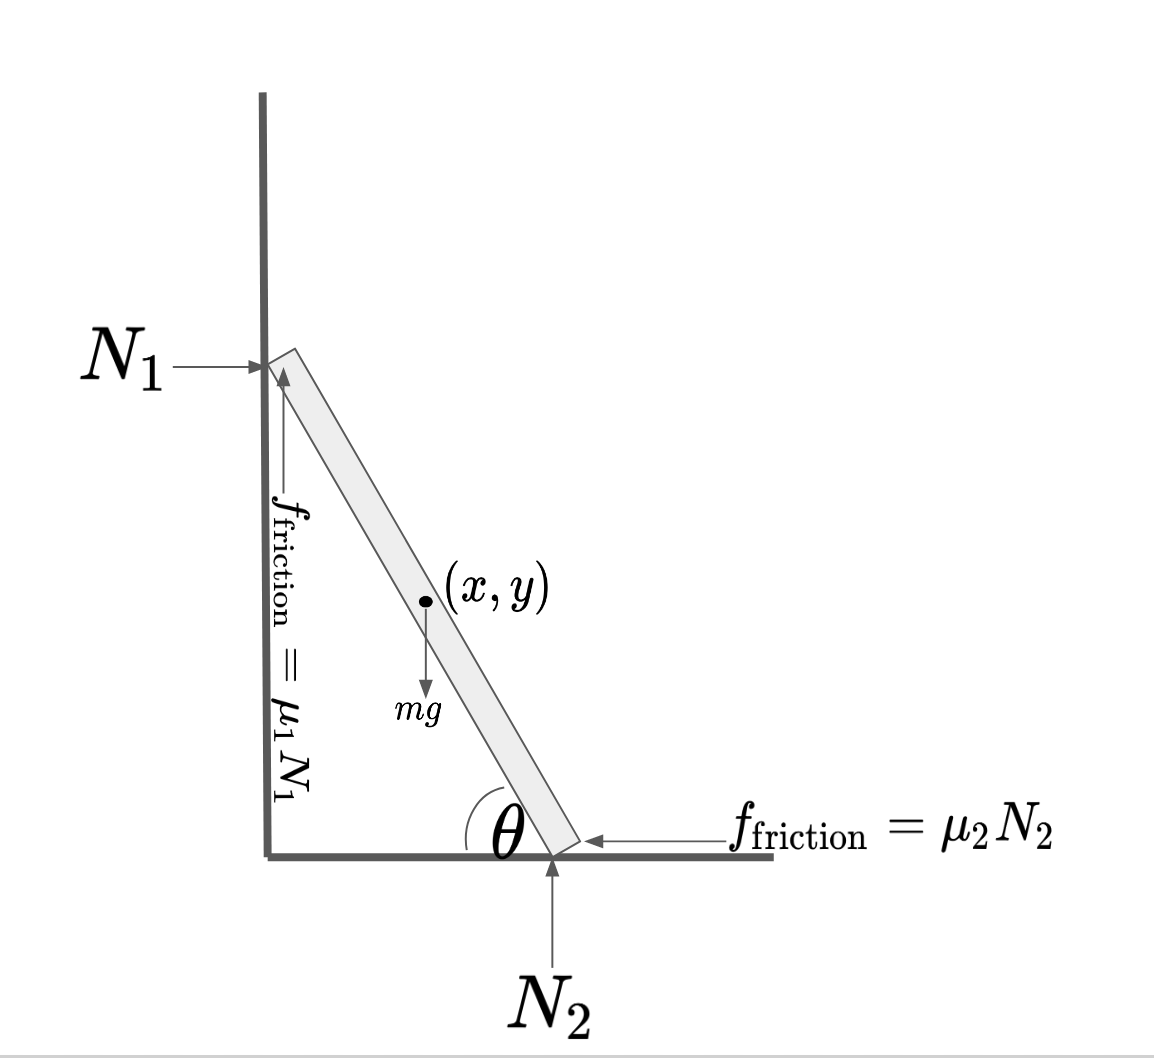


Calculate how long it takes for the bar to fall to the floor.  The acceleration due to gravity is $g.$  Start with an initial condition of $\theta_0= 1.15$ radians, and $\omega_0=\dot{\theta}(0)=0.$

From the mechanics perspective, this involves setting up Newton's second law for the acceleration of the center of mass, and using the torque equation for the rotation of the bar around the center of mass:
\begin{align}\\
-mg+N_2+\mu_1 N_1&=m\ddot{y}\\
N_1-\mu_2 N_2=m\ddot{x}\\
(N_1+\mu_2 N_2)\frac{l}{2} \sin\theta - (N_2-\mu_1 N_1) \frac{l}{2}\cos\theta &=I\ddot{\theta}\\
\end{align}

For a bar, the moment of inertia $I=\frac{1}{12}ml^2.$

The geometry of the situation means that we can't simply plug the equation above into an ODE integrator.  Instead, we need to relate $x$ and $y$ to the angle $\theta:$
\begin{align}\\
x&=\frac{l}{2}\cos\theta\\
\dot{x}&=-\frac{l}{2}\sin\theta \dot{\theta}\\
\ddot{x}&=-\frac{l}{2}\sin\theta \ddot{\theta}-\frac{l}{2}\cos\theta \dot{\theta}^2\\
y&=\frac{l}{2}\sin\theta\\
\dot{y}&=\frac{l}{2}\cos\theta \dot{\theta}\\
\ddot{y}&=\frac{l}{2}\cos\theta \ddot{\theta}-\frac{l}{2}\sin\theta \dot{\theta}^2\\
\end{align}

Now substitute these equations for $\ddot{x}$ and $\ddot{y}$ into the original equation for Newton's laws.  
Solve the ODE numerically.  For each step, you will need to solve the set of simultaneous equations for $\ddot{\theta}$, $N_1,$ and $N_2$.  

Plot $\theta$ as a function of time $t$.  Graphically find the time the bar hits the floor ($\theta=0.$)
Plot $N_1$ and $N_2$ as a function of time $t$.  Discuss any mathematical assumptions in our model that might not reflect reality and how the model would need to change to accommodate them.  



When you are finished, upload your completed exam onto eClass.  Double check that the uploaded exam contains your latest work!